# Problem Statement

A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply. You are a data scientist, who has to come up with useful insights using the data and make prediction models to forecast the sales for X number of months/years.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the file from OS Directory

filepath = "/content/drive/MyDrive/Intellipaat/MIT Capstone Project/Dataset/Walmart.csv"

In [ ]:
# Read the datafile

df = pd.read_csv(filepath)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


## Exploratory Data Analysis

In [ ]:
# Renaming the columns to lowercase

df.rename(columns = {"Store": "store",
                     "Date": "date",
                     "Weekly_Sales": "weekly_sales",
                     "Holiday_Flag": "holiday_flag",
                     "Temperature": "temperature",
                     "Fuel_Price": "fuel_price",
                     "CPI" : "cpi",
                     "Unemployment": "unemployment"}, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6435 non-null   int64  
 1   date          6435 non-null   object 
 2   weekly_sales  6435 non-null   float64
 3   holiday_flag  6435 non-null   int64  
 4   temperature   6435 non-null   float64
 5   fuel_price    6435 non-null   float64
 6   cpi           6435 non-null   float64
 7   unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
# Convert date column from Object to datetime format

df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [ ]:
# Spliting the date column in day, month and year columns respectively

df["day"]= pd.DatetimeIndex(df['date']).day
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year
df

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,day,month,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         6435 non-null   int64         
 1   date          6435 non-null   datetime64[ns]
 2   weekly_sales  6435 non-null   float64       
 3   holiday_flag  6435 non-null   int64         
 4   temperature   6435 non-null   float64       
 5   fuel_price    6435 non-null   float64       
 6   cpi           6435 non-null   float64       
 7   unemployment  6435 non-null   float64       
 8   day           6435 non-null   int64         
 9   month         6435 non-null   int64         
 10  year          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 553.1 KB


In [ ]:
df.describe()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,day,month,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,15.678322,6.447552,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,8.755780,3.238308,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,8.000000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,16.000000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,23.000000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,31.000000,12.000000,2012.000000


In [ ]:
# Checking for null values

df.isnull().sum()

store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
day             0
month           0
year            0
dtype: int64

In [ ]:
df.shape

(6435, 11)

# Data Visualization

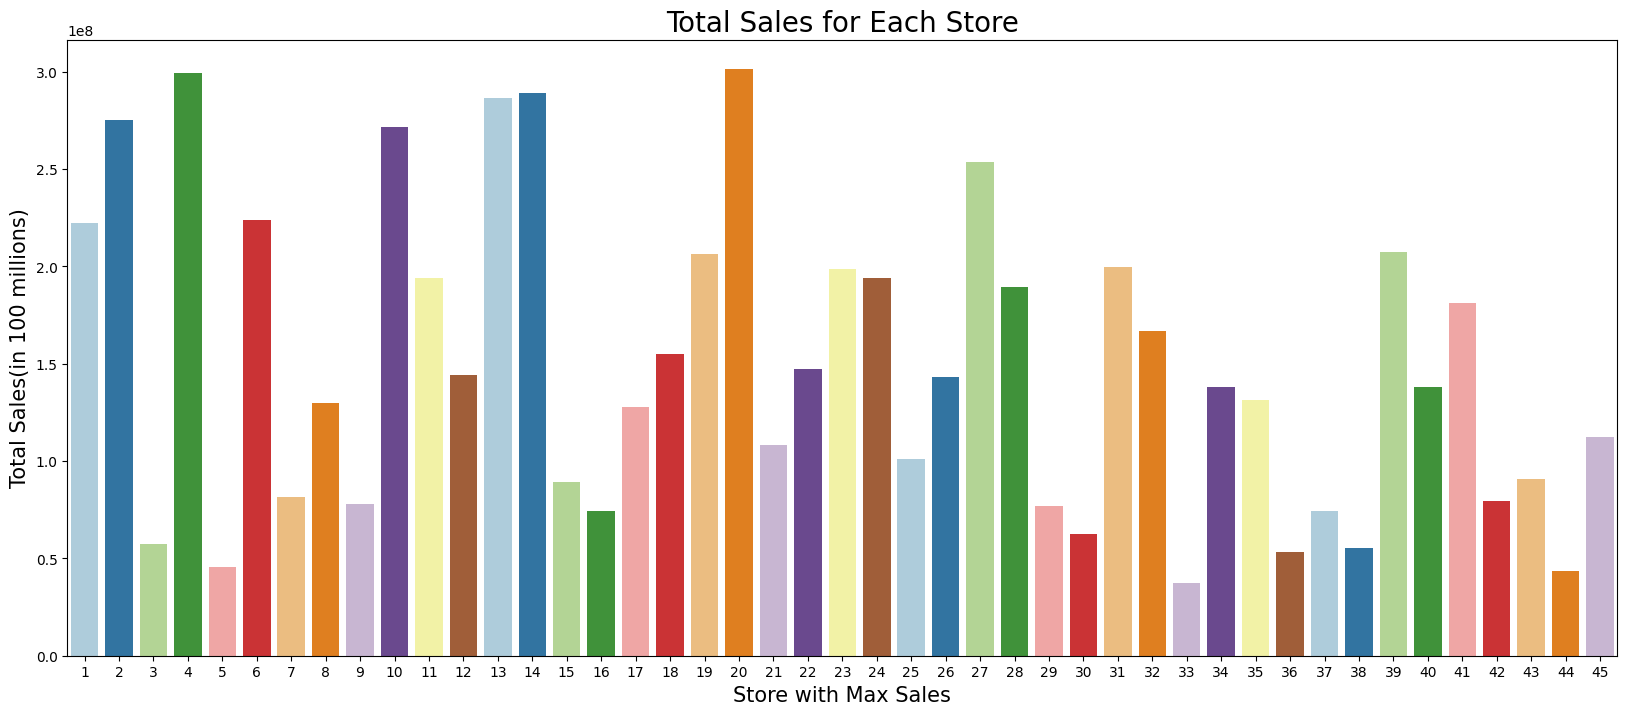

In [ ]:
# Store with the max sales

sales = df.groupby("store")["weekly_sales"].sum().sort_values()

x = sales.keys()
y = sales

plt.figure(figsize = (20,8))
sns.barplot(x = x, y = y, palette = 'Paired')
plt.xlabel("Store with Max Sales", fontsize = 15)
plt.ylabel("Total Sales(in 100 millions)", fontsize = 15)
plt.title("Total Sales for Each Store", fontsize = 20)
plt.show()

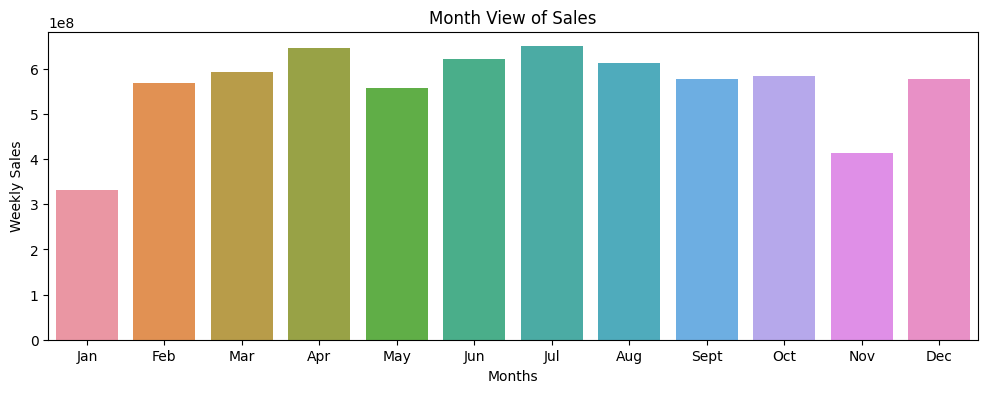

In [ ]:
# Overall Monthly Sales

month = df.groupby('month')['weekly_sales'].sum()

x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
y = month

plt.figure(figsize = (12, 4))
sns.barplot(x = x, y = y)
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Month View of Sales")
plt.show()

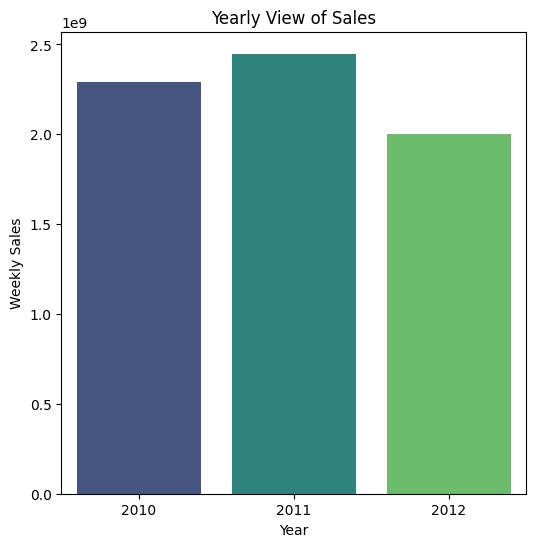

In [ ]:
# Overall Yearly Sales

year = df.groupby('year')['weekly_sales'].sum()

x = year.keys()
y = year

plt.figure(figsize = (6,6))
sns.barplot(x = x, y = y, palette = 'viridis')
plt.xlabel("Year")
plt.ylabel("Weekly Sales")
plt.title("Yearly View of Sales")
plt.show()

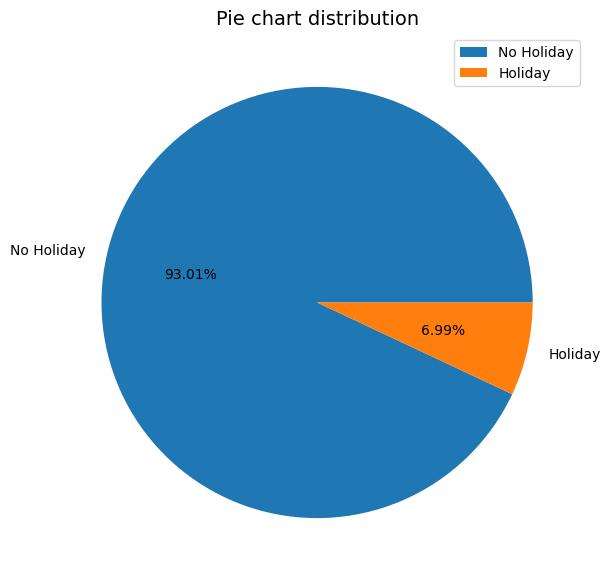

In [ ]:
# Holiday Distribution

plt.figure(figsize=(7,7))
plt.pie(df['holiday_flag'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.show()

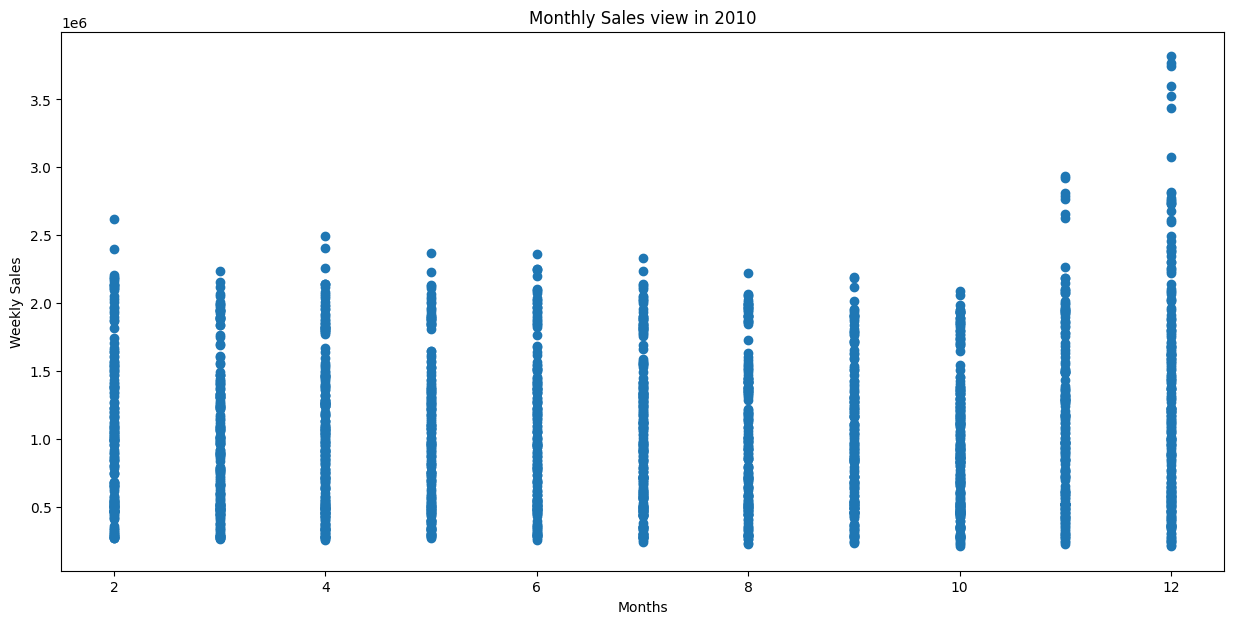

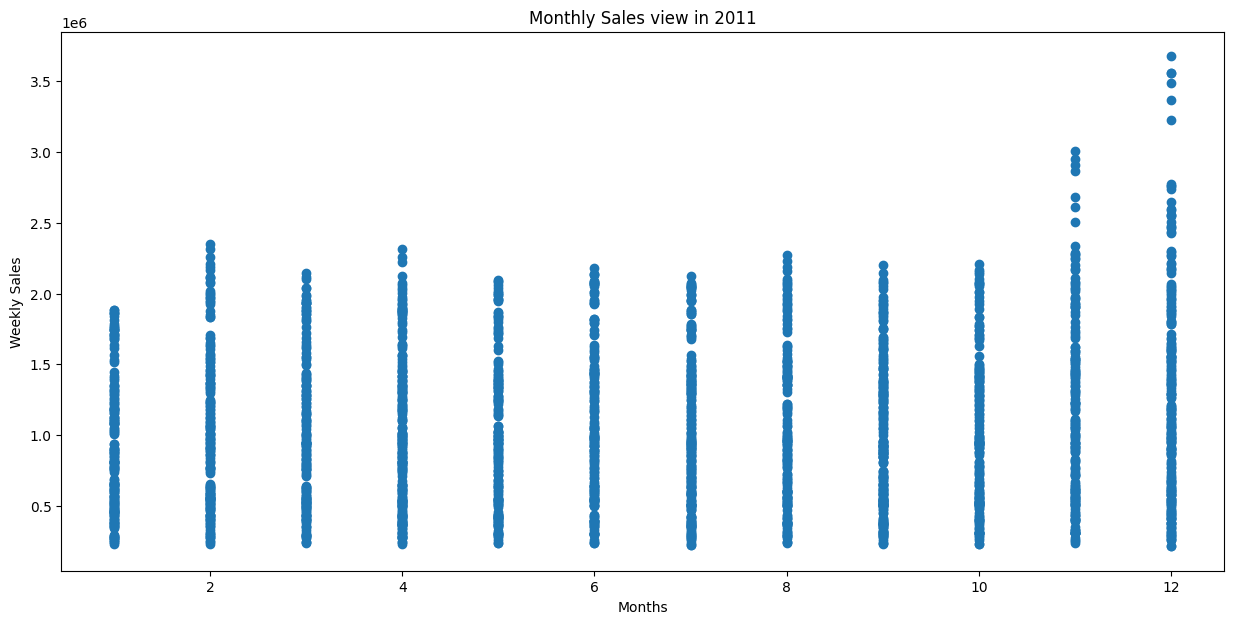

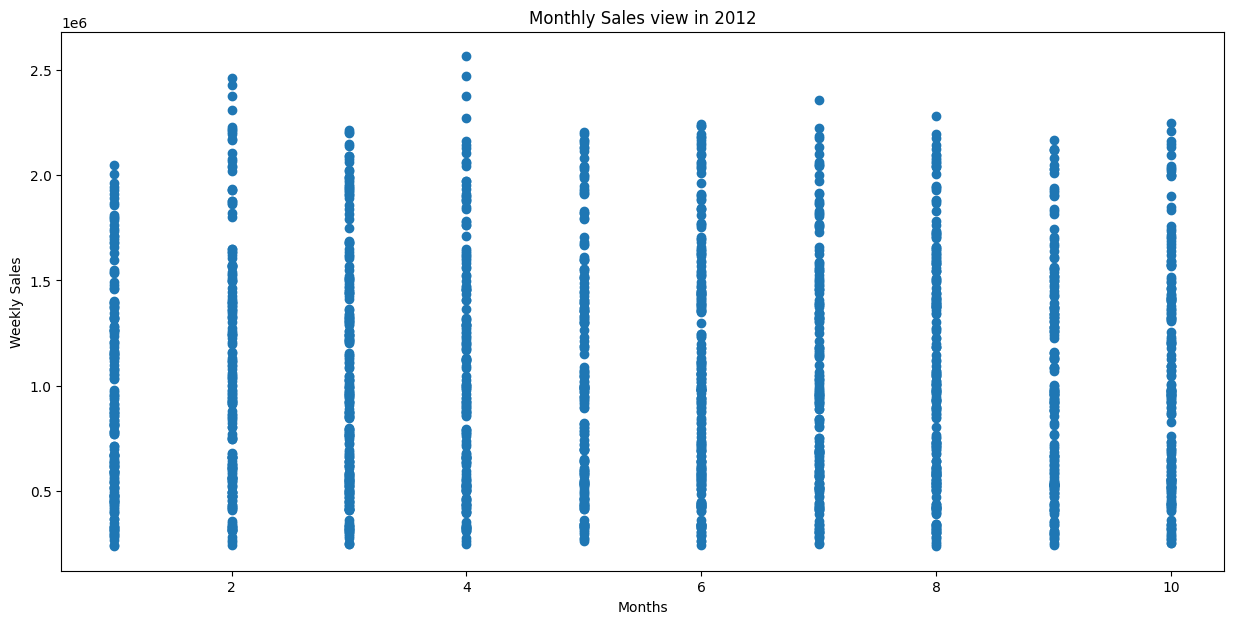

In [ ]:
# Year - Wise Monthly Sales

plt.figure(figsize = (15,7))
plt.scatter(df[df.year == 2010]['month'], df[df.year == 2010]['weekly_sales'])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly Sales view in 2010")
plt.show()

plt.figure(figsize = (15,7))
plt.scatter(df[df.year == 2011]['month'], df[df.year == 2011]['weekly_sales'])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly Sales view in 2011")
plt.show()

plt.figure(figsize = (15,7))
plt.scatter(df[df.year == 2012]['month'], df[df.year == 2012]['weekly_sales'])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly Sales view in 2012")
plt.show()

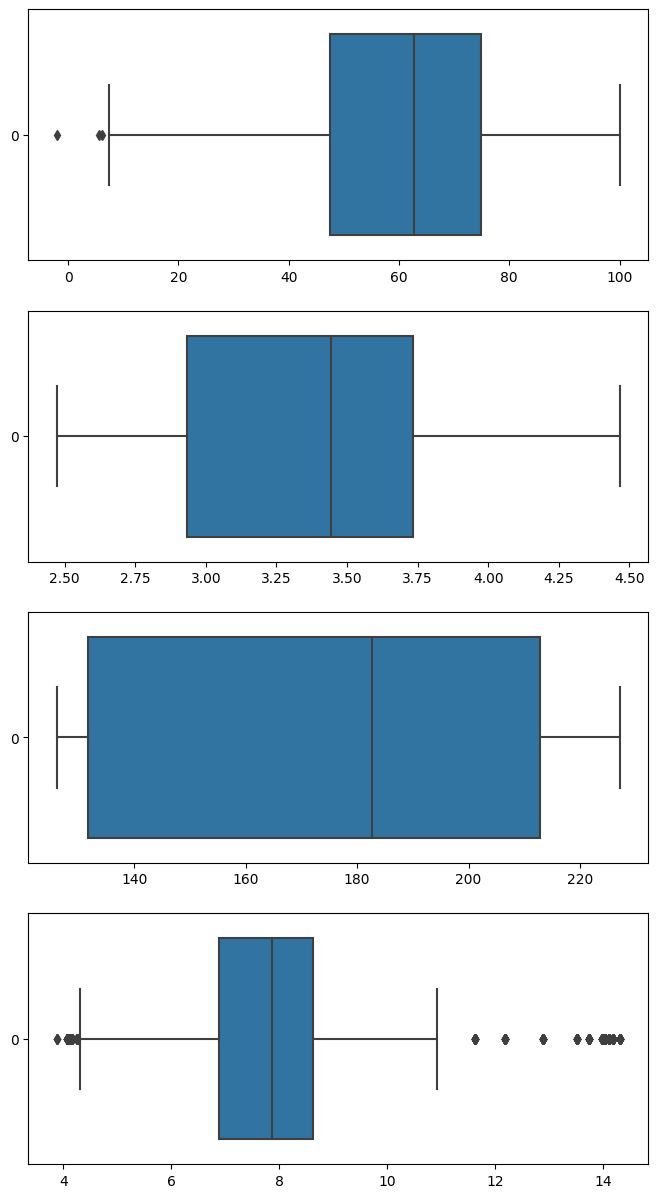

In [ ]:
# Detecting the outliers

fig, axis = plt.subplots(4, figsize = (8,15))
X = df[['temperature', 'fuel_price', 'cpi', 'unemployment']]
for i, column in enumerate(X):
    sns.boxplot(df[column], ax = axis[i], orient = 'h')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Dropping outliers from the data

df_clean = df[(df["temperature"] > 10) &
              (df["unemployment"] > 4.5) &
              (df["unemployment"] < 10)]

df_clean

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,day,month,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


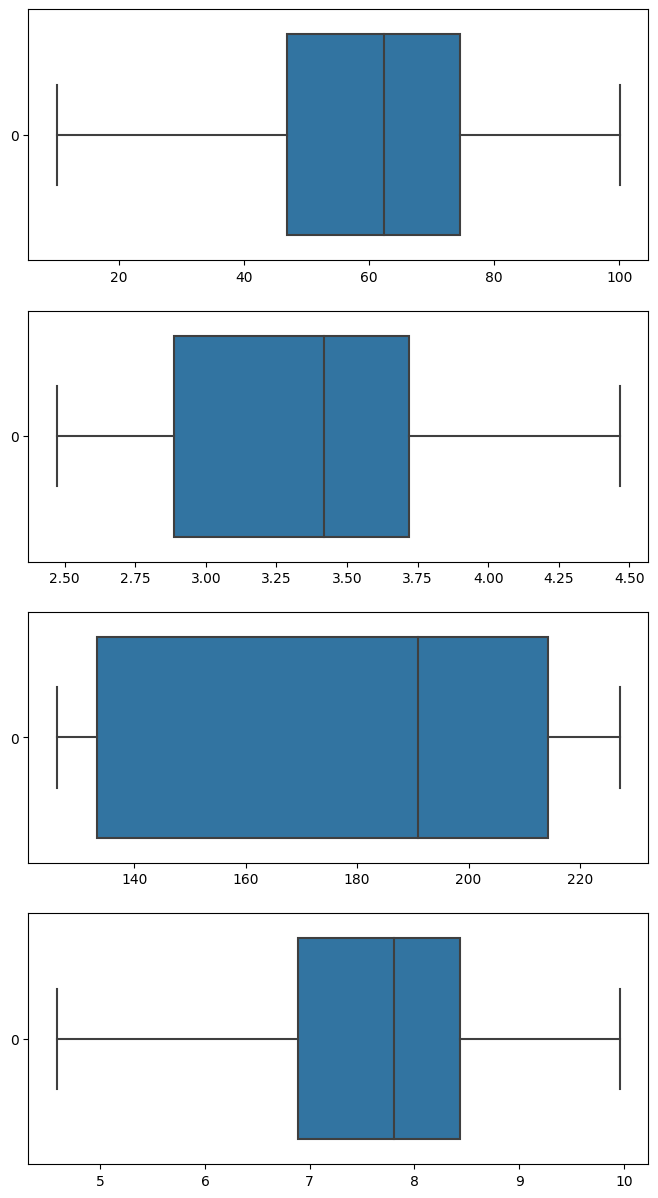

In [ ]:
# Detecting the outliers with new DATA

fig, axis = plt.subplots(4, figsize = (8,15))
X = df_clean[['temperature', 'fuel_price', 'cpi', 'unemployment']]
for i, column in enumerate(X):
    sns.boxplot(df_clean[column], ax = axis[i], orient = 'h')

import warnings
warnings.filterwarnings('ignore')

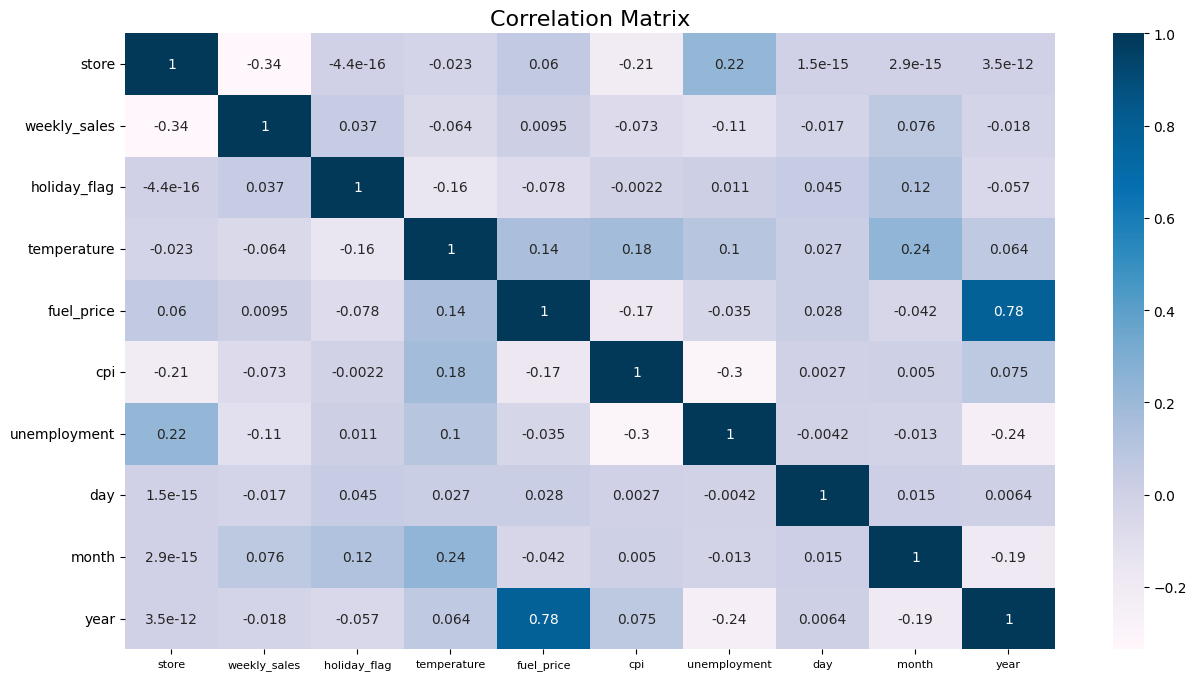

In [ ]:
# Heat Map

plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), cmap='PuBu', annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.xticks(size = 8)
plt.show()

<Figure size 2000x500 with 0 Axes>

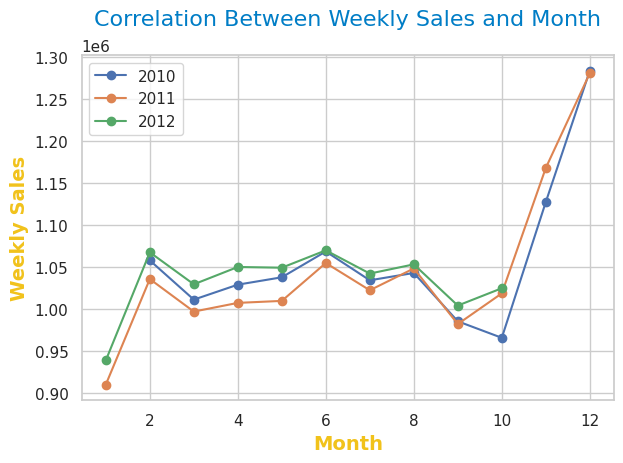

In [ ]:
# Correlation between Weekly Sales & Month
plt.figure(figsize=(20, 5))
sns.set_theme(style="whitegrid")
month_wise_sales = df.pivot_table(values="weekly_sales", columns="year", index="month")
month_wise_sales.plot(marker='o')

# Set the title with Walmart font colors
plt.title('Correlation Between Weekly Sales and Month', color='#007DC6', fontsize=16, pad=10)

# Set the x and y labels with Walmart font colors
plt.xlabel('Month', color='#F1C21B',  fontweight='bold', fontsize=14)
plt.ylabel('Weekly Sales', color='#F1C21B',  fontweight='bold', fontsize=14)

# Adjust plot layout
plt.legend(loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()

# Train Test Split Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_clean.drop(columns = ["weekly_sales", "date"])
Y = df_clean["weekly_sales"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

      store  holiday_flag  temperature  fuel_price         cpi  unemployment  \
5782     41             0        39.94       3.611  192.422595         6.934   
2740     20             0        75.14       2.783  204.357166         7.527   
2774     20             0        39.53       3.582  207.188288         7.343   
4623     33             1        52.91       3.148  127.087677         9.265   
3350     24             0        44.70       3.895  134.177774         8.212   
...     ...           ...          ...         ...         ...           ...   
697       5             0        87.08       3.286  222.430719         5.801   
2151     16             0        33.45       2.692  189.734262         7.039   
2447     18             0        69.12       2.906  132.293936         9.269   
3071     22             0        62.59       4.034  138.678283         8.252   
6234     44             0        63.60       3.648  129.518333         6.560   

      day  month  year  
5782   15     

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
# Initiate the model

LR = LinearRegression()

# Train the model

LR.fit(X_train, Y_train)

# Predict the model

Y_pred1 = LR.predict(X_test)
Y_pred1

array([ 933942.40729474, 1104255.55687217, 1207545.56306725, ...,
       1285565.70631365, 1333807.8972356 , 1162748.1289736 ])

In [ ]:
# Metrics

print("Accuracy:", round(LR.score(X_train, Y_train)*100,2),"%")
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test, Y_pred1))
print("Mean Squared Error:", metrics.mean_squared_error(Y_test, Y_pred1))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred1)))
print("R2 Score:", round(metrics.r2_score(Y_test, Y_pred1)*100,2),"%")

Accuracy: 13.49 %
Mean Absolute Error: 454301.8511017263
Mean Squared Error: 303178774548.84204
Root Mean Squared Error: 550616.7220025578
R2 Score: 12.82 %


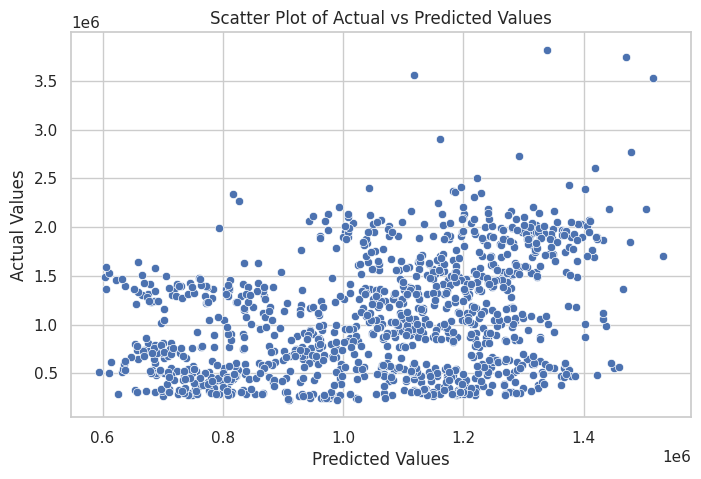

In [ ]:
# Scatter Plot

plt.figure(figsize = (8,5))
sns.scatterplot(x = Y_pred1, y = Y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.show()

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
# Initiate the model

RFR = RandomForestRegressor()

# Train the model

RFR.fit(X_train, Y_train)

# Predict the model

Y_pred2 = RFR.predict(X_test)
Y_pred2

array([ 721978.5546,  475237.9098, 1445006.8393, ...,  390770.1542,
       2026183.2001,  862995.2217])

In [ ]:
# Metrics

print("Accuracy:", round(RFR.score(X_train, Y_train)*100,2),"%")
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test, Y_pred2))
print("Mean Squared Error:", metrics.mean_squared_error(Y_test, Y_pred2))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred2)))
print("R2 Score:", round(metrics.r2_score(Y_test, Y_pred2)*100,2),"%")

Accuracy: 99.38 %
Mean Absolute Error: 60694.93703030038
Mean Squared Error: 14151516491.439718
Root Mean Squared Error: 118960.14665189228
R2 Score: 95.93 %


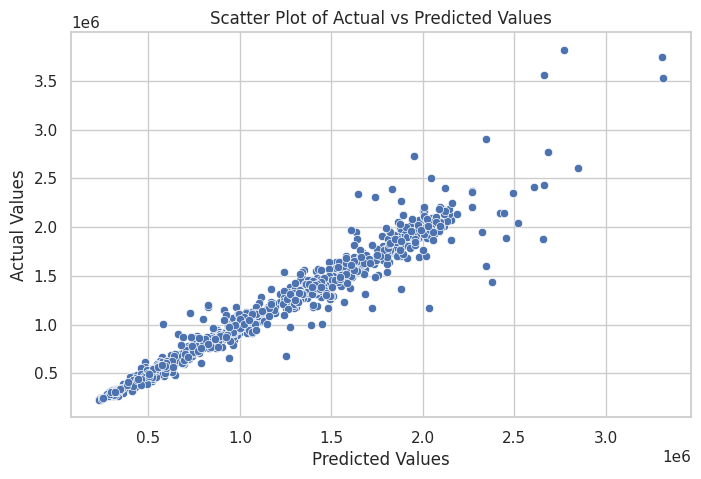

In [ ]:
# Scatter Plot

plt.figure(figsize = (8,5))
sns.scatterplot(x = Y_pred2, y = Y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.show()

# XG Boost Regression

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# Initiate the model

XGB = XGBRegressor(objective ='reg:linear', n_estimators = 100)

# Train the model

XGB.fit(X_train, Y_train)

# Predict the model

Y_pred3 = XGB.predict(X_test)
Y_pred3

array([ 718141.75,  480244.78, 1225728.2 , ...,  397726.56, 1995405.5 ,
        847612.94], dtype=float32)

In [ ]:
# Metrics

print("Accuracy:", round(XGB.score(X_train, Y_train)*100,2),"%")
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test, Y_pred3))
print("Mean Squared Error:", metrics.mean_squared_error(Y_test, Y_pred3))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred3)))
print("R2 Score:", round(metrics.r2_score(Y_test, Y_pred3)*100,2),"%")

Accuracy: 99.78 %
Mean Absolute Error: 48109.72983325972
Mean Squared Error: 6230068039.198256
Root Mean Squared Error: 78930.78004934613
R2 Score: 98.21 %


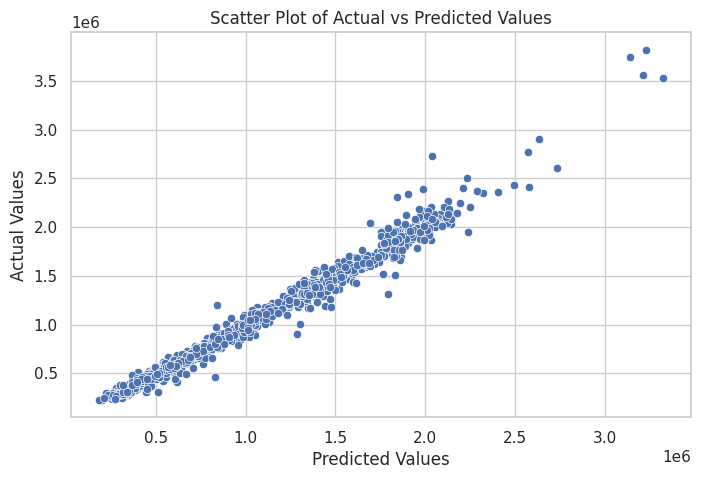

In [ ]:
# Scatter Plot

plt.figure(figsize = (8,5))
sns.scatterplot(x = Y_pred3, y = Y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.show()

# LightGBM Scores

In [ ]:
import lightgbm as lgb

In [ ]:
# Initiate the model

LGB = lgb.LGBMRegressor(objective ='regression', random_state = 42)

# Train the model

LGB.fit(X_train, Y_train)

# Predict the model

Y_pred4 = LGB.predict(X_test)
Y_pred4

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1102
[LightGBM] [Info] Number of data points in the train set: 4526, number of used features: 9
[LightGBM] [Info] Start training from score 1060162.651897


array([ 740648.3297306 ,  549926.28159405, 1296716.35451468, ...,
        415162.36837342, 2041063.77140572,  840349.47405221])

In [ ]:
# Metrics

print("Accuracy:", round(LGB.score(X_train, Y_train)*100,2),"%")
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test, Y_pred4))
print("Mean Squared Error:", metrics.mean_squared_error(Y_test, Y_pred4))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred4)))
print("R2 Score:", round(metrics.r2_score(Y_test, Y_pred4)*100,2),"%")

Accuracy: 98.83 %
Mean Absolute Error: 52331.313736804565
Mean Squared Error: 7831307640.584488
Root Mean Squared Error: 88494.67577535096
R2 Score: 97.75 %


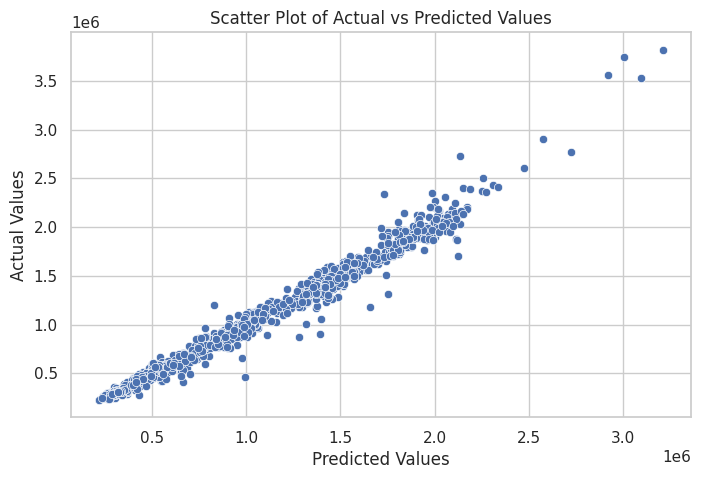

In [ ]:
# Scatter Plot

plt.figure(figsize = (8,5))
sns.scatterplot(x = Y_pred4, y = Y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.show()

# Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Initiate the model

GBR = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model

GBR.fit(X_train, Y_train)

# Predict the model

Y_pred5 = GBR.predict(X_test)
Y_pred5

array([ 756786.97150537,  575939.97738485, 1346708.73235239, ...,
        461138.16342955, 1987536.99530736,  765862.92472991])

In [ ]:
# Metrics

print("Accuracy:", round(GBR.score(X_train, Y_train)*100,2),"%")
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test, Y_pred5))
print("Mean Squared Error:", metrics.mean_squared_error(Y_test, Y_pred5))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred5)))
print("R2 Score:", round(metrics.r2_score(Y_test, Y_pred5)*100,2),"%")

Accuracy: 92.2 %
Mean Absolute Error: 122617.39786989034
Mean Squared Error: 28609888990.291748
Root Mean Squared Error: 169144.58013868416
R2 Score: 91.77 %


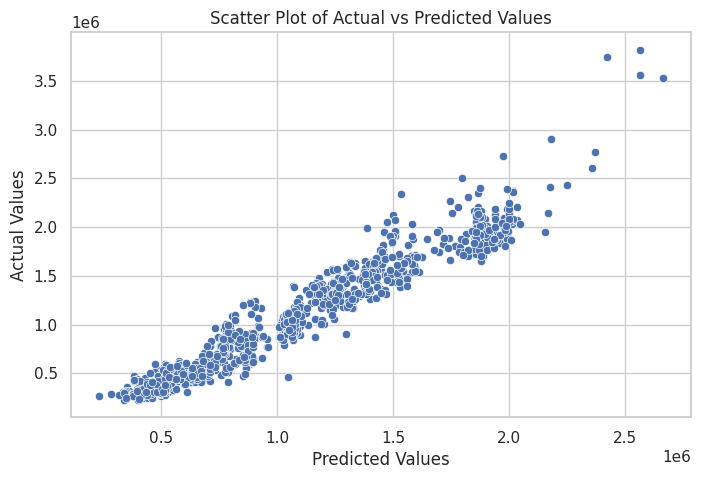

In [ ]:
# Scatter Plot

plt.figure(figsize = (8,5))
sns.scatterplot(x = Y_pred5, y = Y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.show()

# AdaBoosting Score

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
# Initialize the base estimator (a decision tree regressor with max depth 1)
base_estimator = DecisionTreeRegressor(max_depth=1)

# Initiate the model

ADA = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, learning_rate=1.0, random_state=42)

# Train the model

ADA.fit(X_train, Y_train)

# Predict the model

Y_pred6 = ADA.predict(X_test)
Y_pred6

array([ 815849.17511421, 1213595.63512803, 1231190.35332203, ...,
       1213595.63512803, 1213595.63512803, 1213595.63512803])

In [ ]:
# Metrics

print("Accuracy:", round(ADA.score(X_train, Y_train)*100,2),"%")
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test, Y_pred6))
print("Mean Squared Error:", metrics.mean_squared_error(Y_test, Y_pred6))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred6)))
print("R2 Score:", round(metrics.r2_score(Y_test, Y_pred6)*100,2),"%")

Accuracy: 13.35 %
Mean Absolute Error: 458474.7025019332
Mean Squared Error: 291743535395.2317
Root Mean Squared Error: 540132.8867928999
R2 Score: 16.11 %


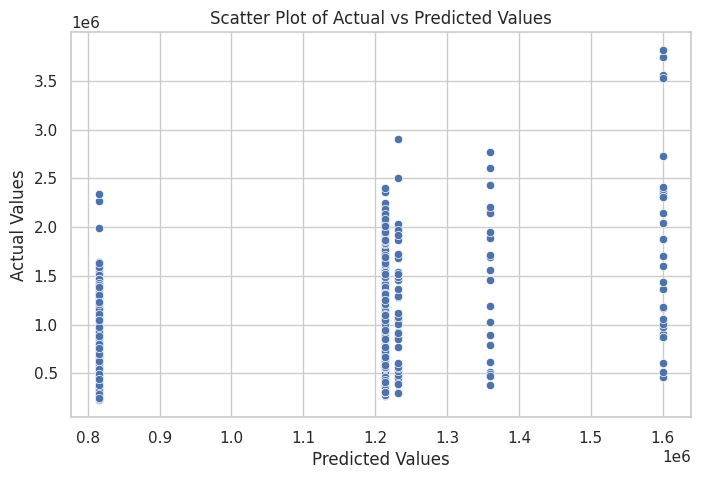

In [ ]:
# Scatter Plot

plt.figure(figsize = (8,5))
sns.scatterplot(x = Y_pred6, y = Y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.show()

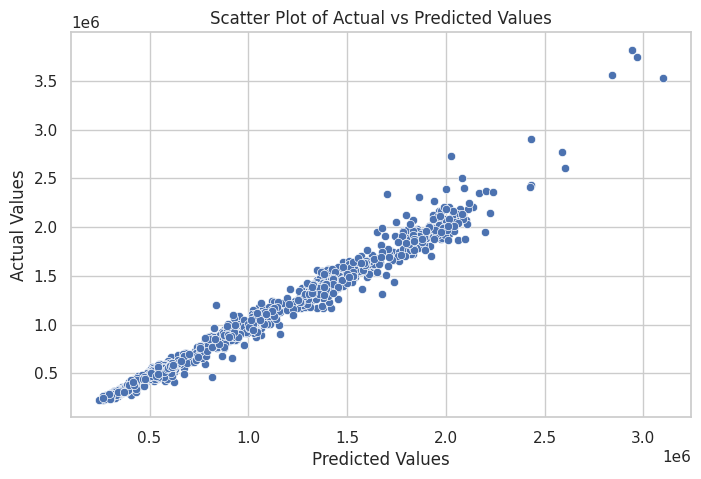

Mean Absolute Error: 56990.55546813837
Mean Squared Error: 8608926105.970814
Root Mean Squared Error: 92784.29881165679
R2 Score: 97.52 %


In [ ]:
# Getting Average of Best Models
Y_pred_final = (Y_pred2  + Y_pred3 + Y_pred4 + Y_pred5 )/4.0

# Scatter Plot
plt.figure(figsize = (8,5))
sns.scatterplot(x = Y_pred_final, y = Y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.show()

# Metrics

print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test, Y_pred_final))
print("Mean Squared Error:", metrics.mean_squared_error(Y_test, Y_pred_final))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_final)))
print("R2 Score:", round(metrics.r2_score(Y_test, Y_pred_final)*100,2),"%")

# Perform T - Test

In [ ]:
from scipy import stats

In [ ]:
# Calculate summary statistics
summary_stats = df.describe()

In [ ]:
# Perform statistical tests or correlations
# Example: Calculate correlation between Weekly Sales and Unemployment Rate
correlation = df['weekly_sales'].corr(df['unemployment'])

In [ ]:
# Additional statistical tests
# Example: t-test comparing Weekly Sales between two groups (Group_A and Group_B)
group_a_sales = df[df['holiday_flag'] == 0]['weekly_sales']
group_b_sales = df[df['holiday_flag'] == 1]['weekly_sales']
t_stat, p_value = stats.ttest_ind(group_a_sales, group_b_sales)

In [ ]:
# Perform t-test
t_stat, p_value = stats.ttest_ind(group_a_sales, group_b_sales)

# Print the results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: -2.9608919093259036
P-Value: 0.003078699263818616


# Forecast Analysis

In [ ]:
import statsmodels.api as sm

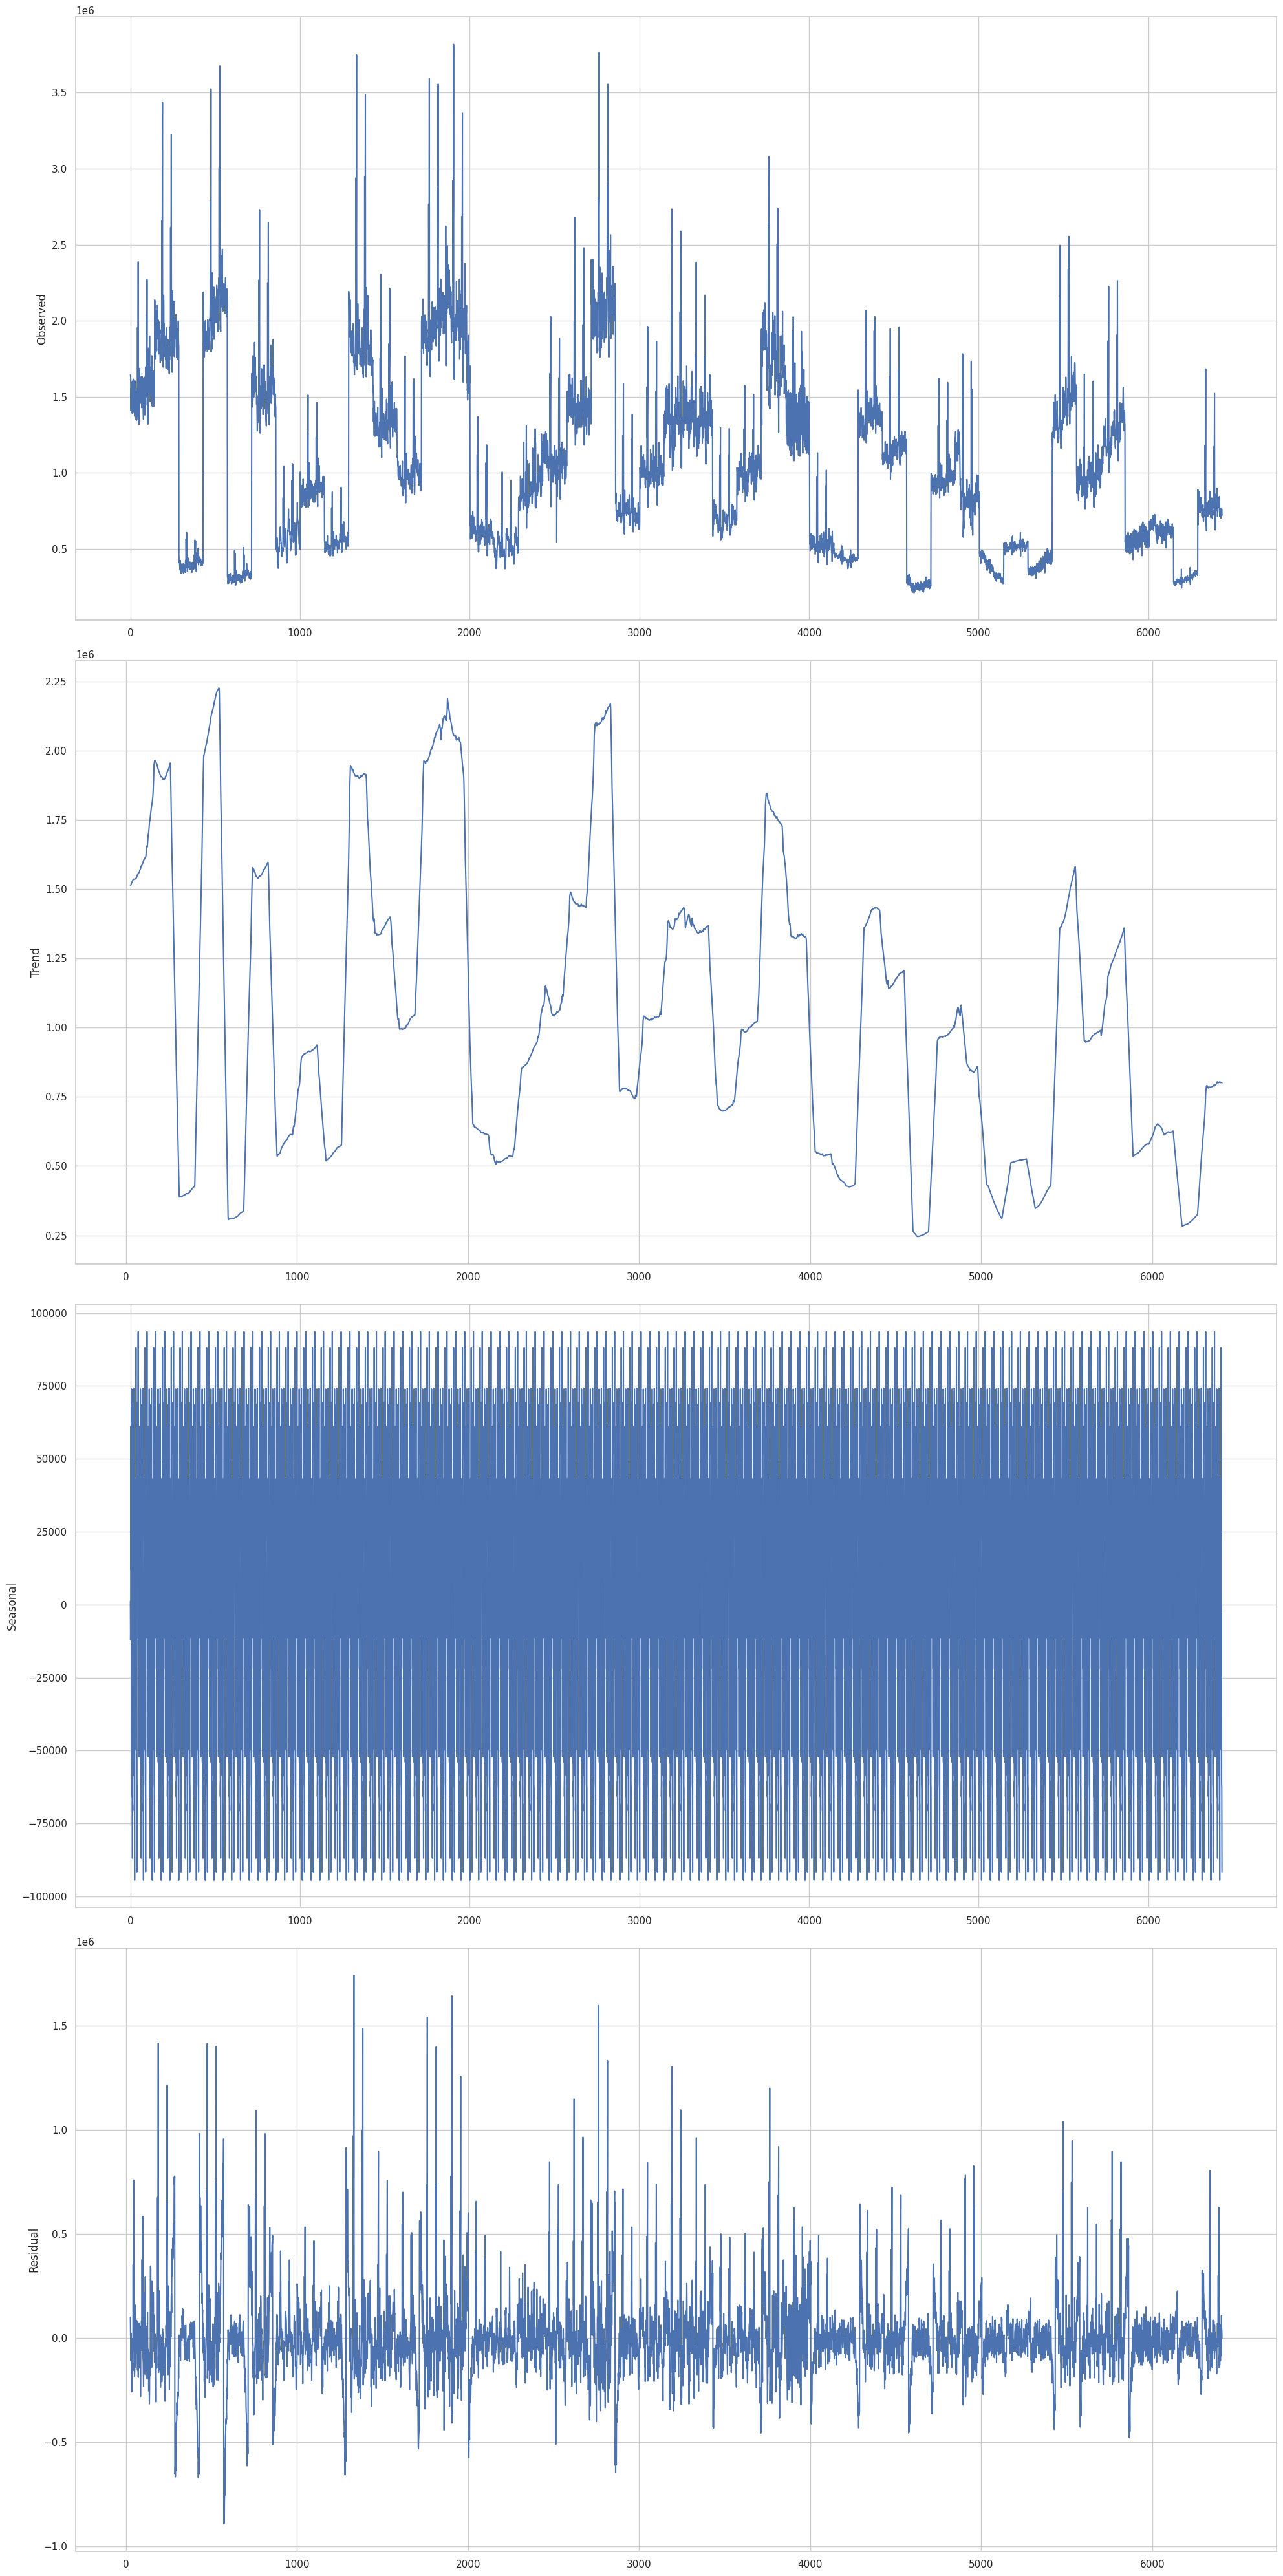

In [ ]:
# Apply time series analysis to identify seasonal trends:

# Use seasonal decomposition to identify seasonal, trend, and residual components
result = sm.tsa.seasonal_decompose(df['weekly_sales'], model='additive', period=52)

# Plot the decomposed components
fig, ax = plt.subplots(4, 1, figsize=(20, 40))
result.observed.plot(ax=ax[0])
ax[0].set_ylabel('Observed')
result.trend.plot(ax=ax[1])
ax[1].set_ylabel('Trend')
result.seasonal.plot(ax=ax[2])
ax[2].set_ylabel('Seasonal')
result.resid.plot(ax=ax[3])
ax[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()

In [ ]:
#2. Aggregate the weekly sales data by store and calculate total sales:

# Assuming you have already loaded and preprocessed the Walmart dataset

# Group the dataset by store
df_by_store = df.groupby('store')['weekly_sales'].sum().reset_index()

# Sort the stores based on total sales
df_by_store_sorted = df_by_store.sort_values('weekly_sales', ascending=False)

# Print the top 5 best performing stores
print("Top 5 Best Performing Stores:")
print(df_by_store_sorted.head())

# Print Empty Row
print("")

# Print the worst performing stores
print("Top 5 Worst Performing Store:")
print(df_by_store_sorted.tail(5))

Top 5 Best Performing Stores:
    store  weekly_sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08

Top 5 Worst Performing Store:
    store  weekly_sales
37     38   55159626.42
35     36   53412214.97
4       5   45475688.90
43     44   43293087.84
32     33   37160221.96


In [ ]:
#3. Rank the stores based on their historical sales data to identify the top performing stores:

# Add a rank column based on total sales
df_by_store_sorted['rank'] = np.arange(1, len(df_by_store_sorted) + 1)

# Print the ranked stores
print("Ranked Stores:")
print(df_by_store_sorted)

Ranked Stores:
    store  weekly_sales  rank
19     20  3.013978e+08     1
3       4  2.995440e+08     2
13     14  2.889999e+08     3
12     13  2.865177e+08     4
1       2  2.753824e+08     5
9      10  2.716177e+08     6
26     27  2.538559e+08     7
5       6  2.237561e+08     8
0       1  2.224028e+08     9
38     39  2.074455e+08    10
18     19  2.066349e+08    11
30     31  1.996139e+08    12
22     23  1.987506e+08    13
23     24  1.940160e+08    14
10     11  1.939628e+08    15
27     28  1.892637e+08    16
40     41  1.813419e+08    17
31     32  1.668192e+08    18
17     18  1.551147e+08    19
21     22  1.470756e+08    20
11     12  1.442872e+08    21
25     26  1.434164e+08    22
33     34  1.382498e+08    23
39     40  1.378703e+08    24
34     35  1.315207e+08    25
7       8  1.299512e+08    26
16     17  1.277821e+08    27
44     45  1.123953e+08    28
20     21  1.081179e+08    29
24     25  1.010612e+08    30
42     43  9.056544e+07    31
14     15  8.913368e+07  

In [ ]:
# Create a new column 'Date' based on the index
df['date'] = df.index

# If the index is not in the correct date format, convert it to datetime format
df['date'] = pd.to_datetime(df['date'])

# Reset the index since we now have the 'Date' column
df.reset_index(drop=True, inplace=True)

# Now, the 'Date' column should be restored in your DataFrame
print(df.head())

   store                          date  weekly_sales  holiday_flag  \
0      1 1970-01-01 00:00:00.000000000    1643690.90             0   
1      1 1970-01-01 00:00:00.000000001    1641957.44             1   
2      1 1970-01-01 00:00:00.000000002    1611968.17             0   
3      1 1970-01-01 00:00:00.000000003    1409727.59             0   
4      1 1970-01-01 00:00:00.000000004    1554806.68             0   

   temperature  fuel_price         cpi  unemployment  day  month  year  
0        42.31       2.572  211.096358         8.106    5      2  2010  
1        38.51       2.548  211.242170         8.106   12      2  2010  
2        39.93       2.514  211.289143         8.106   19      2  2010  
3        46.63       2.561  211.319643         8.106   26      2  2010  
4        46.50       2.625  211.350143         8.106    5      3  2010  


In [ ]:
df.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment', 'day', 'month', 'year'],
      dtype='object')

In [ ]:
# Load the dataset and preprocess the data:

# Convert the 'Date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set the 'Date' column as the index
df.set_index('date', inplace=True)

In [ ]:
# Split the dataset into training and testing sets:

# Split the dataset into 80% train and 20% test
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

In [ ]:
#4. Choose a predictive modeling technique:
#- For linear regression:

model = RandomForestRegressor()

#- For time series forecasting, you may use SARIMAX from the statsmodels library. However, this requires additional preprocessing and stationarity checks for the time series.

In [ ]:
#5. Implement and train the model:

# Assuming you have selected the predictive modeling technique (e.g., Random Forest)

# Separate the target variable from the features
X_train, Y_train = train_data.drop('weekly_sales', axis=1), train_data['weekly_sales']
X_test, Y_test = test_data.drop('weekly_sales', axis=1), test_data['weekly_sales']

# Fit the model on the training data
model.fit(X_train, Y_train)

RandomForestRegressor()

Mean Squared Error: 310662466193.26227


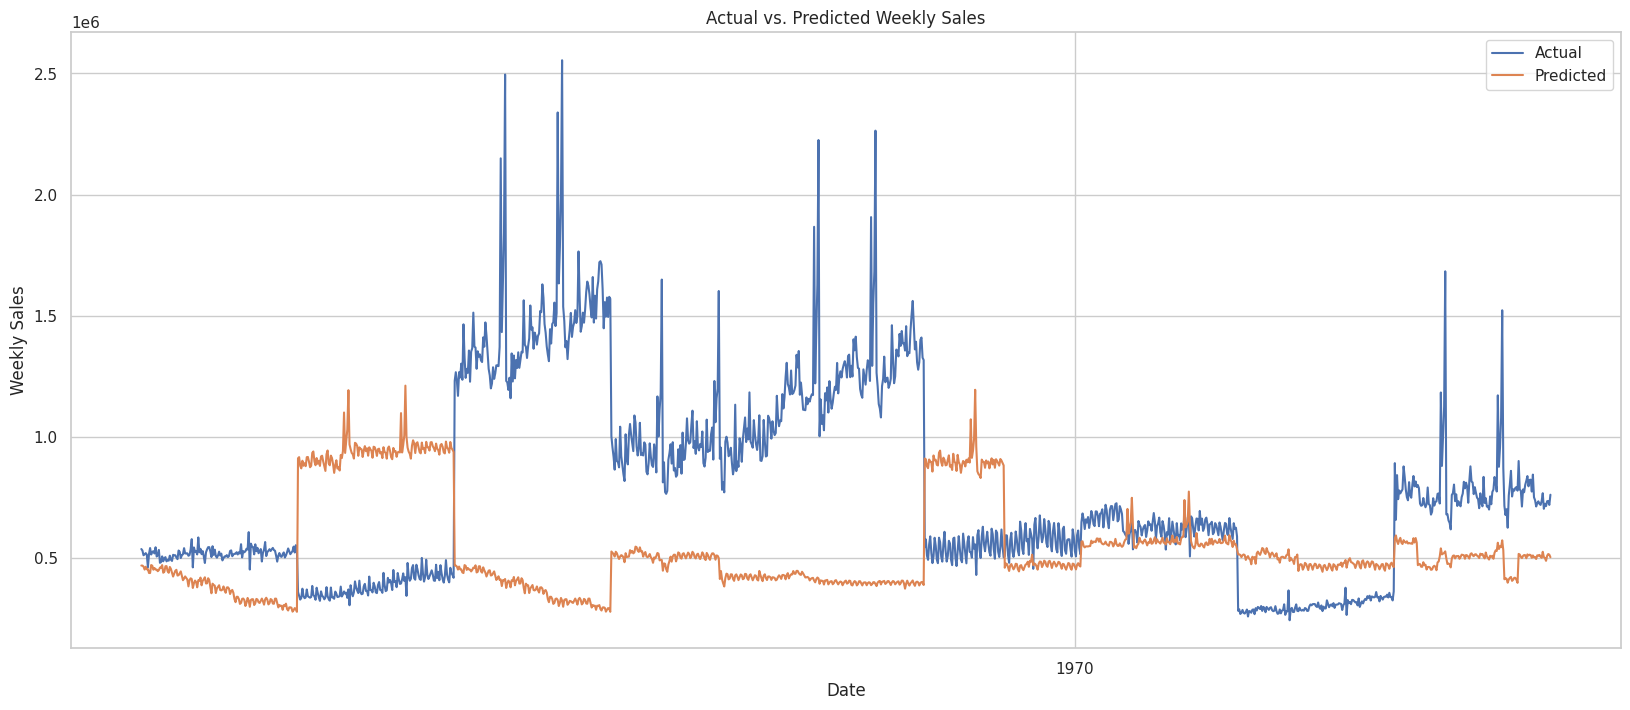

In [ ]:
#6. Evaluate the model's performance:

plt.figure(figsize=(20, 8))

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Evaluate the model using mean squared error (MSE)
mse = metrics.mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Visualize the actual vs. predicted values
plt.plot(Y_test.index, Y_test.values, label='Actual')
plt.plot(Y_test.index, Y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Actual vs. Predicted Weekly Sales')
plt.legend()
plt.show()